In [25]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv(r'C:\DS practice\bhp.csv')

In [20]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0000,2.0000,39.0700,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0000,5.0000,120.0000,4,4615
2,Uttarahalli,3 BHK,1440.0000,2.0000,62.0000,3,4305
3,Lingadheeranahalli,3 BHK,1521.0000,3.0000,95.0000,3,6245
4,Kothanur,2 BHK,1200.0000,2.0000,51.0000,2,4250


In [40]:
df['price_per_sqft'].describe()

count      13200.0000
mean        7920.3367
std       106727.1603
min          267.0000
25%         4267.0000
50%         5438.0000
75%         7317.0000
max     12000000.0000
Name: price_per_sqft, dtype: float64

In [33]:
lower_limit, upper_limit = df['price_per_sqft'].quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

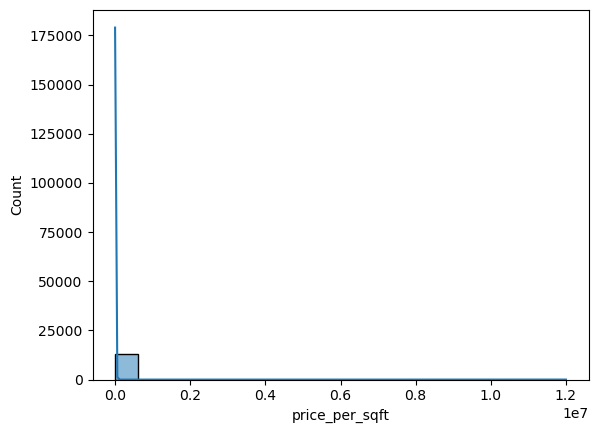

In [42]:
sn.histplot(df.price_per_sqft,bins = 20, kde = True)

In [80]:
Outliers = df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]
Outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5597,JP Nagar,2 BHK,1100.0000,1.0000,15.0000,2,1363
6356,Bommenahalli,4 Bedroom,2940.0000,3.0000,2250.0000,4,76530
9144,other,4 Bedroom,10961.0000,4.0000,80.0000,4,729
7799,other,4 BHK,2000.0000,3.0000,1063.0000,4,53150
1005,other,1 BHK,15.0000,1.0000,30.0000,1,200000
7575,other,1 BHK,425.0000,1.0000,750.0000,1,176470
11635,Begur,3 BHK,2400.0000,3.0000,12.0000,3,500
7862,JP Nagar,3 BHK,20000.0000,3.0000,175.0000,3,875
5343,other,9 BHK,42000.0000,8.0000,175.0000,9,416
9436,Indira Nagar,4 Bedroom,2400.0000,5.0000,1250.0000,4,52083


In [45]:
df2 = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

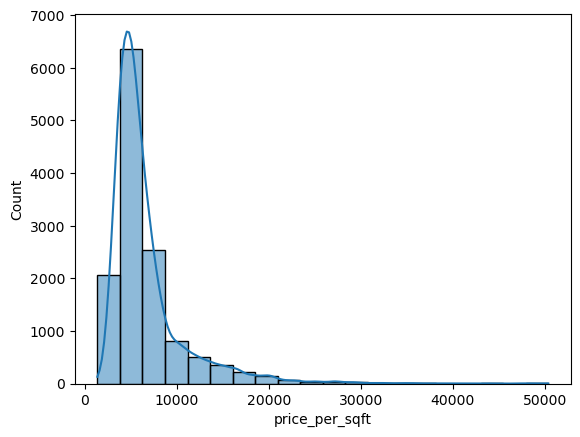

In [46]:
sn.histplot(df2.price_per_sqft,bins = 20, kde = True)

In [47]:
df.shape

(13200, 7)

In [48]:
df2.shape

(13172, 7)

In [50]:
df.shape[0] - df2.shape[0]

28

In [64]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()

In [72]:
Outliers2 = df2[(df2.price_per_sqft < min_limit) | (df2.price_per_sqft > max_limit)]

In [74]:
Outliers2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0000,6.0000,370.0000,6,36274
45,HSR Layout,8 Bedroom,600.0000,9.0000,200.0000,8,33333
190,Bellandur,4 Bedroom,1200.0000,5.0000,325.0000,4,27083
733,Cunningham Road,4 BHK,5270.0000,4.0000,1250.0000,4,23719
760,other,9 Bedroom,600.0000,9.0000,190.0000,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0000,6.0000,2800.0000,6,35000
13094,other,4 Bedroom,1200.0000,5.0000,325.0000,4,27083
13127,other,4 Bedroom,1200.0000,5.0000,325.0000,4,27083
13185,Hulimavu,1 BHK,500.0000,1.0000,220.0000,1,44000


In [70]:
df3 = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]

In [71]:
df2.shape[0] - df3.shape[0]

125

In [81]:
df3.shape

(13047, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

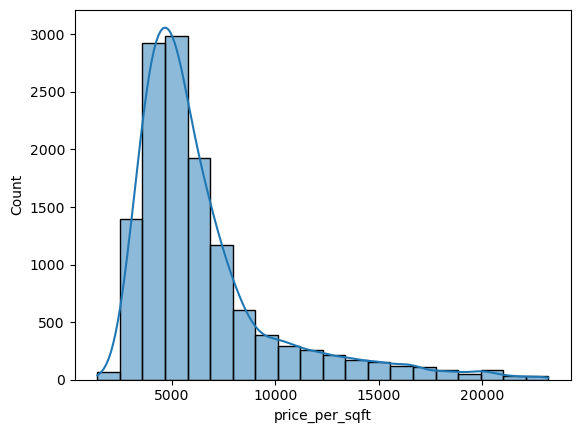

In [84]:
sn.histplot(df3.price_per_sqft, kde = True, bins = 20)

In [92]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\chauzani\AppData\Local\Temp\ipykernel_22716\3749579534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score,zscore
5283,other,2 BHK,1070.0000,2.0000,33.1500,2,3098,-0.8611,-0.8611
11497,Hoodi,2 BHK,1447.0000,3.0000,76.0000,2,5252,-0.3409,-0.3409
12813,Budigere,2 BHK,1153.0000,2.0000,56.5000,2,4900,-0.4259,-0.4259
6835,Chandapura,2 BHK,800.0000,2.0000,25.0000,2,3125,-0.8545,-0.8545
2346,Electronics City Phase 1,2 BHK,1150.0000,2.0000,39.0000,2,3391,-0.7903,-0.7903
9121,Seegehalli,4 Bedroom,4700.0000,5.0000,800.0000,4,17021,2.5012,2.5012
11128,Sarjapur Road,2 BHK,1034.0000,2.0000,38.0000,2,3675,-0.7217,-0.7217
8283,other,3 BHK,1998.0000,3.0000,117.0000,3,5855,-0.1953,-0.1953
10156,Hulimavu,2 BHK,1315.0000,2.0000,60.4800,2,4599,-0.4986,-0.4986
5532,Marathahalli,2 BHK,1050.0000,2.0000,65.0000,2,6190,-0.1144,-0.1144


In [103]:
Outlier3 = df2[(df2.zscore < -4) | (df2.zscore > 4)]

In [104]:
Outlier3

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score,zscore
9,other,6 Bedroom,1020.0000,6.0000,370.0000,6,36274,7.1505,7.1505
45,HSR Layout,8 Bedroom,600.0000,9.0000,200.0000,8,33333,6.4403,6.4403
190,Bellandur,4 Bedroom,1200.0000,5.0000,325.0000,4,27083,4.9310,4.9310
733,Cunningham Road,4 BHK,5270.0000,4.0000,1250.0000,4,23719,4.1186,4.1186
760,other,9 Bedroom,600.0000,9.0000,190.0000,9,31666,6.0377,6.0377
...,...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0000,6.0000,2800.0000,6,35000,6.8428,6.8428
13094,other,4 Bedroom,1200.0000,5.0000,325.0000,4,27083,4.9310,4.9310
13127,other,4 Bedroom,1200.0000,5.0000,325.0000,4,27083,4.9310,4.9310
13185,Hulimavu,1 BHK,500.0000,1.0000,220.0000,1,44000,9.0162,9.0162


In [105]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

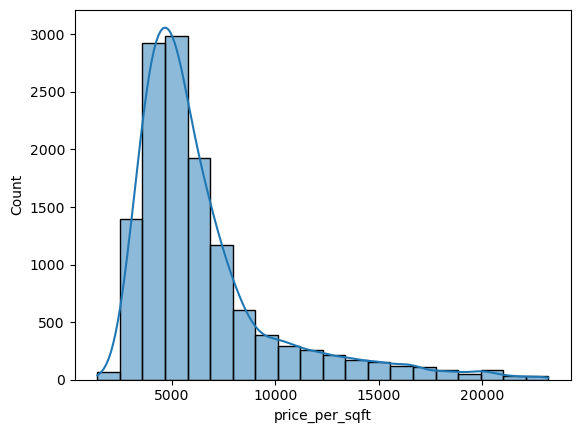

In [106]:
sn.histplot(df4.price_per_sqft, kde = True, bins = 20)